<a href="https://colab.research.google.com/github/Eric-Mendes/treino-de-pandas/blob/main/analise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dataset Titanic

In [24]:
# Fazendo os imports necessários e inicializando o dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
print("shape df com NaN:", df.shape)
print("shape df sem NaN:", df.dropna().shape)
print("Informação perdida: %.2f%%" % (100 * (1 - df.dropna().shape[0] / df.shape[0])))

shape df com NaN: (891, 15)
shape df sem NaN: (182, 15)
Informação perdida: 79.57%


[Exploração dos dados] Ao fazer o drop de linhas com algum valor faltante, perdemos uma quantidade significativa de registros. Talvez uma melhor estratégia seja preenchê-las de alguma maneira.

In [26]:
df = df.drop_duplicates()

In [27]:
df['alive'] = df['alive'].replace({'no': 0, 'yes': 1})
df.loc[df['alive'] != df['survived']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


[Feature Engineering] Acima pudemos ver que as colunas alive e survived aparentam ser intercambiáveis. Sugiro droparmos uma delas (irei tirar a coluna "alive", pois acho que o nome de atributo "survived" é mais legível).

In [28]:
df = df.drop(labels='alive', axis='columns')



---



In [29]:
df['who'].value_counts()

man      451
woman    251
child     82
Name: who, dtype: int64

In [30]:
df['adult_male'].value_counts()

True     451
False    333
Name: adult_male, dtype: int64

[Feature Engineering] Note como a informação trazida pela coluna "adult_male" aparenta poder ser "inferida" pela coluna "who". Testaremos esta hipótese, e caso verdadeira manteremos a coluna "who".

In [31]:
df.loc[(df['adult_male'] == True) & (df['who'] != 'man')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone


In [32]:
df = df.drop(labels='adult_male', axis='columns')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,NaN,Southampton,True




---



[Feature Engineering] As colunas "class" e "pclass" também trazem as mesmas informações. Deixaremos a coluna "pclass" por já ser numérica.

In [33]:
df['class'].value_counts()

Third     405
First     214
Second    165
Name: class, dtype: int64

In [34]:
df['pclass'].value_counts()

3    405
1    214
2    165
Name: pclass, dtype: int64

In [35]:
df = df.drop(labels='class', axis='columns')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,NaN,Southampton,True




---



In [36]:
df['embarked'].value_counts()

S    568
C    155
Q     59
Name: embarked, dtype: int64

In [37]:
df['embark_town'].value_counts()

Southampton    568
Cherbourg      155
Queenstown      59
Name: embark_town, dtype: int64

[Feature Engineering] Mais colunas iguais :)

In [38]:
df = df.drop(labels='embark_town', axis='columns')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,NaN,True




---



In [39]:
df = df.dropna(subset=['age'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,NaN,True


In [40]:
df['age'] = df['age'].astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22,1,0,7.2500,S,man,NaN,False
1,1,1,female,38,1,0,71.2833,C,woman,C,False
2,1,3,female,26,0,0,7.9250,S,woman,NaN,True
3,1,1,female,35,1,0,53.1000,S,woman,C,False
4,0,3,male,35,0,0,8.0500,S,man,NaN,True


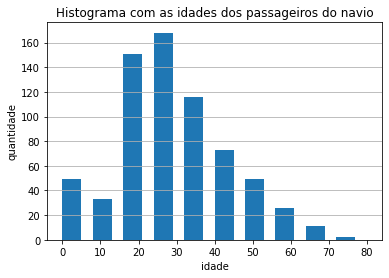

In [41]:
plt.title('Histograma com as idades dos passageiros do navio')
plt.hist(x=df['age'], bins=10, width=5)
plt.grid(axis='y')
plt.xlabel('idade')
plt.ylabel('quantidade')
plt.show()